In [3]:
import pandas as pd
import numpy as np
import os
from io import StringIO

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import glob
import re
import os
from io import StringIO
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.converter import TextConverter
import PyPDF2

In [5]:
os.chdir('/Users/alisdghnia/Desktop/')

In [6]:
df1 = pd.read_excel('Full Dataset Cleaned with Excel Calculations.xlsx')

In [7]:
df1

,Unnamed: 0,Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Abstract Section,Summary Section,Reference Section,...,Circulating Supply,Abstract Int,Summary Int,Reference Int,Circulating Supply.1,Unnamed: 19,Volume in Currency (24Hr).1,Unnamed: 21,Market Cap.1,Unnamed: 23
0,0,WeTrust1.pdf,1.342260,40,12504,43.02,7.33,True,False,True,...,92148000,1,0,1,92.148M,92148000,3,3.0,228813,228813.0
1,1,Libra4.pdf,0.293671,41,17474,54.42,6.51,True,False,True,...,0,1,0,1,0,0,131,131.0,0,0.0
2,2,B2BX1.pdf,15.404950,42,1,121.22,19.48,False,False,False,...,0,0,0,0,0,0,9220,9220.0,0,0.0
3,3,Bytom1.pdf,0.374002,17,4536,34.15,7.79,True,False,True,...,1764000000,1,0,1,1.764B,1764000000,1.088M,1088000.0,21.831M,21831000.0
4,4,Cindicator1.pdf,1.123809,37,15509,42.92,7.08,False,False,False,...,2000000000,0,0,0,2B,2000000000,65,65.0,1.342M,1342000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,551,CPChain1.pdf,1.195266,34,7203,40.28,6.96,False,False,False,...,376766000,0,0,0,376.766M,376766000,111473,111473.0,1.363M,1363000.0
552,552,Presearch2.pdf,5.291211,39,12904,41.70,7.16,True,False,False,...,396578000,1,0,0,396.578M,396578000,107073,107073.0,33.127M,33127000.0
553,553,Electra1.pdf,0.624846,34,5508,37.13,9.05,True,True,False,...,0,1,1,0,0,0,48,48.0,0,0.0
554,554,Blockmason1.pdf,3.355893,31,13640,49.04,7.00,False,False,False,...,116159000,0,0,0,116.159M,116159000,9,9.0,283474,283474.0


In [8]:
df2 = pd.read_excel('TFIDF smaller Dataset.xlsx')

In [9]:
df2

,File Name,aarhus,abbreviate,abdelmalek,abound,abstracts,abu,accelerates,accessories,acclaim,...,Ô¨Åfth,Ô¨Ånalised,Ô¨Ånalization,Ô¨Åred,Ô¨Årmly,Ô¨Åscal,Ô¨Åxedpoint,Ô¨Çagged,Ô¨Çoat,Ô¨Çuid
0,WeTrust1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Libra4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B2BX1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bytom1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cindicator1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,CPChain1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,Presearch2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551,Electra1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552,Blockmason1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df3 = pd.read_csv('Files Texts Dataframe.csv')

In [11]:
df3 = df3.rename(columns= {'Unnamed: 0':'File Name'})

In [12]:
df3

,File Name,Text Corpus
0,WeTrust1,wetrust whitepaper table of contents \n\n \n\n...
1,Libra4,state machine replication in the libra\n\nbloc...
2,B2BX1,23\n\n
3,Bytom1,bytomv1.0 ...
4,Cindicator1,hybrid intelligence for\n\neective asset mana...
...,...,...
551,CPChain1,\t\n\ncyber-physical chain (cpchain) whitepape...
552,Presearch2,whitepaper\n\nthe community-powered search eng...
553,Electra1,"white paper\n\nrelease 1.0 / january 31, 2018\..."
554,Blockmason1,the credit protocol whitepaper v1.0.1\n\nblock...


In [13]:
tfidf = pd.read_csv('TFIDF smaller Dataset.csv')

In [14]:
tfidf

,File Name,aarhus,abbreviate,abdelmalek,abound,abstracts,abu,accelerates,accessories,acclaim,...,ﬁfth,ﬁnalised,ﬁnalization,ﬁred,ﬁrmly,ﬁscal,ﬁxedpoint,ﬂagged,ﬂoat,ﬂuid
0,WeTrust1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Libra4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B2BX1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bytom1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cindicator1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,CPChain1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,Presearch2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551,Electra1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552,Blockmason1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(tfidf_array, price_array, 
                                                    random_state = 0)

#count_vect = CountVectorizer(stop_words= 'english',lowercase=True)
#X_train_counts = count_vect.fit_transform(X_train)

#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train, y_train)

ValueError: Unknown label type: (array([4.018700e+00, 3.416010e-01, 5.840000e-04, 2.976000e-03,
       1.572000e-03, 9.160000e-04, 3.727100e-02, 8.495700e+00,
       6.000000e-05, 1.212000e+00, 5.315000e-03, 4.273600e-02,
       1.160000e-04, 4.541000e-03, 8.470000e-04, 1.100000e-05,
       1.573400e+02, 9.704000e+01, 2.704000e-02, 1.173400e+00,
       1.547000e+01, 4.541000e-03, 4.740480e-01, 7.345200e-02,
       1.170000e-04, 1.573400e+02, 1.529450e-01, 7.751000e-03,
       4.682000e-03, 7.870000e-04, 1.820000e-04, 3.174120e-01,
       1.126100e-02, 3.462900e-02, 3.685500e-01, 4.325200e-02,
       1.000200e+00, 8.061120e-01, 5.364700e-02, 9.800000e-07,
       1.969900e-02, 1.573400e+02, 2.253100e-02, 1.170000e-04,
       5.665000e-03, 1.014200e+00, 3.619000e-03, 1.221000e-01,
       1.732200e-02, 3.090420e-01, 6.420000e-04, 0.000000e+00,
       1.478000e-03, 8.061120e-01, 3.685500e-01, 1.116000e-03,
       3.868600e-02, 1.170000e-04, 5.205000e+01, 3.416010e-01,
       8.353100e-02, 2.600000e-05, 3.652000e-03, 4.579000e-03,
       5.864590e-01, 3.400000e-05, 4.740480e-01, 4.934000e-03,
       6.710000e-04, 2.433000e-03, 5.205000e+01, 1.478000e-03,
       6.065900e+00, 1.441670e-01, 2.149600e+00, 8.160000e-03,
       3.502870e-01, 3.416010e-01, 8.962000e-02, 7.650000e-03,
       1.584000e+01, 2.770600e-02, 2.747000e-03, 2.270000e-04,
       5.775600e+00, 6.018200e-02, 1.110000e-04, 7.629000e+01,
       2.747000e-03, 4.018700e+00, 1.980440e-01, 2.493480e-01,
       4.325200e-02, 5.315000e-03, 2.600000e-05, 9.550000e-04,
       2.793100e-02, 1.147000e-02, 5.315000e-03, 2.279800e+00,
       1.570000e-03, 2.408230e-01, 1.919000e-01, 1.086000e+01,
       7.870000e-04, 6.250000e-04, 2.695550e-01, 0.000000e+00,
       3.831200e-02, 8.671500e+00, 4.022060e-01, 1.346900e-02,
       1.448230e-01, 4.620000e-04, 8.900000e-05, 3.663000e-03,
       3.737000e-03, 4.888000e-03, 3.416010e-01, 2.071000e-03,
       1.096300e-02, 2.279800e+00, 1.573400e+02, 1.617000e-03,
       1.800000e-05, 3.416010e-01, 4.970000e-04, 5.320000e-04,
       4.376000e-03, 4.740480e-01, 5.001000e-03, 0.000000e+00,
       4.250000e-04, 6.272430e-01, 7.083090e-01, 2.231400e-02,
       8.353100e-02, 3.216000e-03, 1.170000e-04, 1.259000e-02,
       9.704000e+01, 6.870000e-04, 1.740000e-04, 2.839410e-01,
       5.008000e-02, 7.629000e+01, 3.599000e+01, 1.776200e-02,
       1.144600e-02, 7.629000e+01, 6.870000e-04, 1.709100e-02,
       9.848150e-01, 4.000000e-08, 8.495900e+00, 1.064180e+03,
       6.580470e-01, 1.889600e+00, 3.198200e-02, 5.798000e-03,
       2.403700e-02, 2.630000e-04, 6.000000e-08, 3.265960e-01,
       1.108920e-01, 7.380000e-04, 4.888000e-03, 1.441670e-01,
       1.212300e-02, 1.140000e-03, 5.322000e-03, 1.374000e-03,
       4.810000e-04, 1.123000e-03, 1.220300e-02, 9.577700e-02,
       2.114200e+00, 1.573400e+02, 1.086000e+01, 1.005000e-03,
       3.621000e-02, 5.000000e-05, 7.435910e-01, 3.251000e-02,
       1.075900e-02, 1.711740e-01, 0.000000e+00, 4.136000e+01,
       8.666000e-03, 3.656100e-02, 4.630000e-03, 3.099400e-01,
       5.413000e-03, 1.716210e-01, 2.169000e-02, 3.732000e-03,
       4.119770e-01, 2.578700e-02, 8.690000e-04, 1.433000e-03,
       7.870000e-04, 1.573400e+02, 9.500000e-05, 4.685800e-02,
       1.116000e-03, 7.692000e-03, 7.435910e-01, 2.960000e-04,
       7.629000e+01, 9.848150e-01, 1.355600e+00, 9.000000e-08,
       1.809740e-01, 4.500000e-05, 3.685500e-01, 2.355760e-01,
       5.103580e-01, 2.287519e+04, 2.341660e-01, 4.887900e-02,
       1.821000e-03, 1.110000e-04, 1.774200e+00, 2.967300e-02,
       4.100900e-02, 3.168000e-03, 2.433000e-03, 1.830710e-01,
       2.680000e-04, 1.500370e-01, 1.788230e+03, 9.237200e-02,
       6.407000e-03, 4.164000e-03, 7.650000e-03, 1.689930e-01,
       5.001000e-03, 2.433000e-03, 1.931760e-01, 2.202810e-01,
       6.840200e-02, 3.414680e-01, 1.030100e-02, 1.983000e-03,
       1.100000e-05, 5.103580e-01, 1.080000e-04, 1.919000e-01,
       6.191290e-01, 3.637190e-01, 3.685500e-01, 7.000000e-05,
       2.362000e-02, 2.277800e-02, 2.680000e-04, 7.260000e-04,
       1.014000e-03, 6.795000e-03, 3.180800e-02, 2.920000e-04,
       1.501410e-01, 8.360000e-04, 0.000000e+00, 1.050180e-01,
       4.433180e-01, 1.128740e-01, 4.231520e-01, 1.237500e-02,
       1.834000e-03, 2.778650e-01, 1.145000e-03, 1.682820e+03,
       2.033500e-02, 2.910000e-04, 1.506300e+00, 2.493480e-01,
       4.658000e-03, 3.685500e-01, 4.452000e-02, 4.221050e-01,
       3.685500e-01, 3.272000e-03, 2.967300e-02, 0.000000e+00,
       1.573400e+02, 5.610440e-01, 7.090000e-02, 6.620000e-04,
       5.880000e-04, 1.592900e-02, 9.827600e-02, 6.840200e-02,
       1.200000e-05, 1.427700e-02, 2.440000e-04, 3.434000e-03,
       4.164000e-02, 1.374000e-03, 2.683000e-03, 2.290816e+04,
       3.084800e-02, 5.550000e-04, 1.221000e-03, 2.289000e-03,
       1.969000e-03, 3.770000e+01, 2.290816e+04, 3.216000e-03,
       7.293500e-02, 9.888000e-03, 6.100000e-05, 1.448230e-01,
       1.982000e-03, 5.103580e-01, 5.961000e-03, 3.216000e-03,
       2.483000e-03, 5.577400e-02, 1.808900e-02, 8.671500e+00,
       1.170000e-04, 8.356900e+00, 1.534020e-01, 1.556000e-03,
       4.580000e-04, 4.200200e+00, 0.000000e+00, 3.174120e-01,
       1.769250e-01, 2.016710e-01, 1.939000e-02, 1.532100e+00,
       3.700000e-04, 0.000000e+00, 3.660000e-02, 5.441000e-03,
       3.722000e-03, 7.700000e-05, 5.573400e-02, 5.103580e-01,
       2.656100e-02, 2.510000e-04, 4.007100e-02, 1.130000e-06,
       1.573400e+02, 2.373500e-02, 1.969000e-03, 2.290000e-04,
       1.809740e-01, 1.040000e-03, 3.198200e-02, 2.695550e-01,
       6.241000e-03, 5.892000e+00, 5.573400e-02, 1.838100e-02,
       5.375120e-01, 2.433000e-03, 9.705000e-03, 1.618000e+01,
       2.010000e-04, 6.122000e+01, 2.071000e-03, 4.376000e-03,
       1.151400e-02, 6.620000e-04, 1.464000e-03, 2.016710e-01,
       4.580000e-04, 7.728500e-02, 3.414680e-01, 0.000000e+00,
       1.579640e-01, 3.559700e-02, 3.216000e-03, 3.084800e-02,
       2.764000e-03, 1.145000e-03, 6.338000e-03, 5.776600e-02,
       1.259000e-02, 7.852000e-03, 3.535790e-01, 4.046000e-03,
       3.656100e-02, 9.805500e-01, 6.095330e-01, 4.273600e-02,
       3.700000e-05, 7.654000e-03, 2.114070e-01, 6.840200e-02,
       5.185100e-02, 8.110000e-06, 1.682820e+03, 1.893880e-01,
       2.320000e-04, 7.090000e-02, 1.315310e-01, 3.405800e-01,
       5.008000e-02, 1.097000e-03, 8.271800e-02, 6.620000e-04,
       8.962000e-02, 3.653000e-03, 2.149600e+00, 2.087000e-03,
       8.014000e+00, 7.692000e-03, 6.000000e-05, 5.336000e-03,
       2.482880e-01, 8.970000e-04, 8.962000e-02]),)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Text Corpus'], df['Price (Intraday)'], 
                                                    random_state = 0)

count_vect = CountVectorizer(stop_words= 'english',lowercase=True)
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

ValueError: Unknown label type: (array([3.732000e-03, 8.061120e-01, 5.840000e-04, 2.976000e-03,
       1.572000e-03, 3.700000e-04, 3.727100e-02, 1.682820e+03,
       1.437170e-01, 1.534020e-01, 9.823000e-02, 6.420000e-04,
       2.034000e+01, 9.888000e-03, 4.164000e-02, 6.000000e-05,
       1.573400e+02, 9.704000e+01, 2.704000e-02, 4.325200e-02,
       3.084800e-02, 6.272430e-01, 1.140000e-03, 7.345200e-02,
       1.170000e-04, 1.573400e+02, 1.871400e-02, 7.751000e-03,
       4.682000e-03, 7.870000e-04, 1.130000e-06, 2.231400e-02,
       4.541000e-03, 3.462900e-02, 7.629000e+01, 1.573400e+02,
       1.000200e+00, 2.114200e+00, 5.364700e-02, 2.778650e-01,
       1.026400e+00, 1.259000e-02, 4.740480e-01, 1.170000e-04,
       5.665000e-03, 1.014200e+00, 3.619000e-03, 8.495700e+00,
       1.732200e-02, 2.277800e-02, 1.547000e+01, 3.667000e+00,
       3.685500e-01, 8.110000e-06, 3.987000e-03, 4.119770e-01,
       3.621000e-02, 1.170000e-04, 2.920000e-04, 8.061120e-01,
       8.353100e-02, 2.600000e-05, 3.656100e-02, 2.578700e-02,
       3.656100e-02, 8.962000e-02, 4.740480e-01, 1.709100e-02,
       6.710000e-04, 2.433000e-03, 3.685500e-01, 4.119770e-01,
       6.065900e+00, 1.170000e-04, 1.448230e-01, 8.160000e-03,
       7.360000e-04, 0.000000e+00, 1.808900e-02, 1.064180e+03,
       1.584000e+01, 1.221000e-03, 6.100000e-05, 7.700000e-05,
       1.478000e-03, 9.300000e-05, 1.173400e+00, 7.629000e+01,
       2.747000e-03, 0.000000e+00, 1.980440e-01, 2.493480e-01,
       2.087000e-03, 1.740000e-04, 2.600000e-05, 2.341660e-01,
       2.793100e-02, 1.809740e-01, 4.376000e-03, 3.414680e-01,
       1.570000e-03, 2.408230e-01, 1.808900e-02, 1.086000e+01,
       7.870000e-04, 6.250000e-04, 7.650000e-03, 0.000000e+00,
       1.478000e-03, 6.338000e-03, 1.050180e-01, 1.346900e-02,
       1.448230e-01, 4.620000e-04, 3.652000e-03, 1.618000e+02,
       8.962000e-02, 5.001000e-03, 3.416010e-01, 2.071000e-03,
       2.569910e-01, 2.300000e-05, 1.573400e+02, 9.550000e-04,
       2.279800e+00, 3.416010e-01, 4.970000e-04, 5.320000e-04,
       4.376000e-03, 1.532100e+00, 5.001000e-03, 0.000000e+00,
       5.322000e-03, 5.008000e-02, 6.840200e-02, 1.821000e-03,
       8.353100e-02, 3.216000e-03, 1.889600e+00, 1.259000e-02,
       9.704000e+01, 6.870000e-04, 2.289000e-03, 2.839410e-01,
       2.320000e-04, 1.116000e-03, 3.599000e+01, 1.776200e-02,
       1.097000e-03, 7.629000e+01, 7.090000e-02, 3.722000e-03,
       3.251000e-02, 4.000000e-08, 8.495900e+00, 4.018700e+00,
       6.580470e-01, 6.000000e-08, 3.198200e-02, 0.000000e+00,
       2.403700e-02, 2.630000e-04, 1.939000e-02, 2.794990e+03,
       1.151000e-03, 3.868600e-02, 2.085000e-03, 3.216000e-03,
       1.190300e-02, 3.770000e+01, 8.962000e-02, 1.374000e-03,
       4.810000e-04, 1.123000e-03, 1.220300e-02, 2.780000e-06,
       2.866000e-03, 1.145000e-03, 4.579000e-03, 8.360000e-04,
       9.827600e-02, 5.000000e-05, 1.160000e-04, 4.821700e-02,
       1.075900e-02, 1.711740e-01, 4.909830e-01, 4.136000e+01,
       9.577700e-02, 4.273600e-02, 4.630000e-03, 3.099400e-01,
       1.838100e-02, 1.716210e-01, 9.685800e-02, 6.191290e-01,
       7.629000e+01, 1.800000e-05, 8.690000e-04, 1.433000e-03,
       7.870000e-04, 9.000000e-08, 9.500000e-05, 6.191290e-01,
       1.573400e+02, 7.692000e-03, 4.280200e-02, 7.591870e-01,
       3.685500e-01, 2.270000e-04, 1.931760e-01, 8.666000e-03,
       8.061120e-01, 5.315000e-03, 7.293500e-02, 2.355760e-01,
       3.973000e+01, 4.934000e-03, 2.341660e-01, 4.887900e-02,
       1.427700e-02, 3.685500e-01, 1.774200e+00, 2.967300e-02,
       4.100900e-02, 3.168000e-03, 2.433000e-03, 1.830710e-01,
       1.682820e+03, 1.500370e-01, 1.788230e+03, 1.441670e-01,
       3.685500e-01, 4.164000e-03, 5.798000e-03, 6.122000e+01,
       7.540000e-04, 2.433000e-03, 5.864590e-01, 5.103580e-01,
       7.083090e-01, 1.896380e-01, 5.103580e-01, 1.983000e-03,
       1.100000e-05, 2.202810e-01, 5.892000e+00, 1.919000e-01,
       6.870000e-04, 3.831200e-02, 1.337400e+02, 7.000000e-05,
       8.671500e+00, 1.573400e+02, 1.618000e+01, 7.260000e-04,
       1.891100e-02, 6.795000e-03, 3.180800e-02, 6.018200e-02,
       1.501410e-01, 1.573400e+02, 0.000000e+00, 2.440000e-04,
       4.433180e-01, 1.969000e-03, 4.231520e-01, 1.237500e-02,
       1.834000e-03, 2.210000e-04, 1.529450e-01, 2.680000e-04,
       2.279800e+00, 1.126100e-02, 1.506300e+00, 2.493480e-01,
       4.658000e-03, 1.173400e+00, 1.005000e-03, 4.221050e-01,
       3.700000e-05, 7.380000e-04, 2.279800e+00, 3.416010e-01,
       7.629000e+01, 5.610440e-01, 7.090000e-02, 6.620000e-04,
       3.653000e-03, 1.579640e-01, 2.750000e+01, 5.315000e-03,
       2.253100e-02, 5.776600e-02, 3.416010e-01, 3.434000e-03,
       8.900000e-05, 5.775600e+00, 2.683000e-03, 2.290816e+04,
       3.084800e-02, 5.550000e-04, 9.800000e-07, 4.500000e-05,
       1.969000e-03, 1.617000e-03, 2.290816e+04, 3.216000e-03,
       5.573400e-02, 3.315000e-03, 1.355600e+00, 1.682000e-03,
       1.982000e-03, 1.212300e-02, 5.961000e-03, 3.216000e-03,
       2.483000e-03, 5.577400e-02, 1.230830e-01, 8.671500e+00,
       1.170000e-04, 8.356900e+00, 1.315310e-01, 1.556000e-03,
       4.580000e-04, 5.573400e-02, 0.000000e+00, 1.993990e-01,
       3.400000e-05, 2.016710e-01, 1.145000e-03, 0.000000e+00,
       4.250000e-04, 6.725000e-03, 3.660000e-02, 1.096300e-02,
       4.018700e+00, 6.000000e-05, 5.798000e-03, 8.470000e-04,
       2.656100e-02, 2.510000e-04, 4.007100e-02, 3.685500e-01,
       1.145000e-03, 2.373500e-02, 6.407000e-03, 6.840200e-02,
       4.541000e-03, 1.040000e-03, 3.198200e-02, 5.205000e+01,
       6.241000e-03, 5.892000e+00, 2.695550e-01, 6.095330e-01,
       5.103580e-01, 9.160000e-04, 3.416010e-01, 2.035700e-02,
       7.435910e-01, 7.210000e-04, 2.071000e-03, 2.770600e-02,
       1.151400e-02, 6.620000e-04, 1.464000e-03, 2.016710e-01,
       4.580000e-04, 4.740480e-01, 1.689930e-01, 0.000000e+00,
       4.022060e-01, 5.315000e-03, 3.174120e-01, 1.200000e-05,
       2.290000e-04, 1.573400e+02, 2.169000e-02, 5.103580e-01,
       1.259000e-02, 7.852000e-03, 1.110000e-04, 4.046000e-03,
       4.273600e-02, 9.805500e-01, 3.685500e-01, 7.435910e-01,
       2.910000e-04, 7.654000e-03, 2.114070e-01, 3.414680e-01,
       8.200000e-04, 1.592900e-02, 9.237200e-02, 1.893880e-01,
       2.290000e-04, 1.769250e-01, 1.100000e-05, 1.256000e-03,
       5.008000e-02, 4.888000e-03, 1.086000e+01, 6.620000e-04,
       1.300000e-05, 4.888000e-03, 2.149600e+00, 5.336000e-03,
       8.014000e+00, 7.692000e-03, 3.112470e-01, 4.325200e-02,
       2.482880e-01, 8.970000e-04, 6.840200e-02]),)

In [16]:
df3['category_id'] = df3['Text Corpus'].factorize()[0]

In [17]:
from io import StringIO
category_id_df = df3[['File Name', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'File Name']].values)
df3.head()

,File Name,Text Corpus,category_id
0,WeTrust1,wetrust whitepaper table of contents \n\n \n\n...,0
1,Libra4,state machine replication in the libra\n\nbloc...,1
2,B2BX1,23\n\n,2
3,Bytom1,bytomv1.0 ...,3
4,Cindicator1,hybrid intelligence for\n\neective asset mana...,4


In [18]:
df3 = df3.dropna()

In [19]:
import re
import os
from io import StringIO
def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', str(text))
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace


def remove_stops(text, stops):
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", str(text))
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

In [20]:
new_corpus = []
for i in df3['Text Corpus']:
    i = clean_text(i)
    i = remove_stops(i, 'english')
    new_corpus.append(i)

df3['New Corpus'] = new_corpus

/var/folders/_9/qq7pw_fx125c812gfv1wl_180000gn/T/ipykernel_27290/3548841591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['New Corpus'] = new_corpus


In [21]:
df3

,File Name,Text Corpus,category_id,New Corpus
0,WeTrust1,wetrust whitepaper table of contents \n\n \n\n...,0,wetrust whitepaper table of contents abstract ...
1,Libra4,state machine replication in the libra\n\nbloc...,1,state machine replication in the libra blockch...
2,B2BX1,23\n\n,2,
3,Bytom1,bytomv1.0 ...,3,bytomv bytom an interoperation protocol for di...
4,Cindicator1,hybrid intelligence for\n\neective asset mana...,4,hybrid intelligence for eective asset managem...
...,...,...,...,...
551,CPChain1,\t\n\ncyber-physical chain (cpchain) whitepape...,539,cyberphysical chain cpchain whitepaper decentr...
552,Presearch2,whitepaper\n\nthe community-powered search eng...,540,whitepaper the communitypowered search engine ...
553,Electra1,"white paper\n\nrelease 1.0 / january 31, 2018\...",541,white paper release january table of contents ...
554,Blockmason1,the credit protocol whitepaper v1.0.1\n\nblock...,542,the credit protocol whitepaper v blockmason te...


In [22]:
df = df3.drop(columns=['Text Corpus'])

In [23]:
df

,File Name,category_id,New Corpus
0,WeTrust1,0,wetrust whitepaper table of contents abstract ...
1,Libra4,1,state machine replication in the libra blockch...
2,B2BX1,2,
3,Bytom1,3,bytomv bytom an interoperation protocol for di...
4,Cindicator1,4,hybrid intelligence for eective asset managem...
...,...,...,...
551,CPChain1,539,cyberphysical chain cpchain whitepaper decentr...
552,Presearch2,540,whitepaper the communitypowered search engine ...
553,Electra1,541,white paper release january table of contents ...
554,Blockmason1,542,the credit protocol whitepaper v blockmason te...


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.01, min_df=5, norm='l2', lowercase= True,
                        encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df3['New Corpus']).toarray()
labels = df.category_id
features.shape

(554, 12031)

In [60]:
df3 = df3.rename(columns= {'File Name':'file_name'})

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for file_name, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(file_name))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

KeyboardInterrupt: 

In [25]:
df

,File Name,category_id,New Corpus
0,WeTrust1,0,wetrust whitepaper table of contents abstract ...
1,Libra4,1,state machine replication in the libra blockch...
2,B2BX1,2,
3,Bytom1,3,bytomv bytom an interoperation protocol for di...
4,Cindicator1,4,hybrid intelligence for eective asset managem...
...,...,...,...
551,CPChain1,539,cyberphysical chain cpchain whitepaper decentr...
552,Presearch2,540,whitepaper the communitypowered search engine ...
553,Electra1,541,white paper release january table of contents ...
554,Blockmason1,542,the credit protocol whitepaper v blockmason te...


In [27]:
names = []
for i in df1['Name']:
    i=i.replace(".pdf","")
    names.append(i)

df1['Name'] = names

In [28]:
all_df = pd.merge(df, df1, left_on = 'File Name', right_on = 'Name')

In [29]:
all_df = all_df.drop(columns= ['Unnamed: 0'])

In [30]:
all_df

,File Name,category_id,New Corpus,Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Abstract Section,...,Circulating Supply,Abstract Int,Summary Int,Reference Int,Circulating Supply.1,Unnamed: 19,Volume in Currency (24Hr).1,Unnamed: 21,Market Cap.1,Unnamed: 23
0,WeTrust1,0,wetrust whitepaper table of contents abstract ...,WeTrust1,1.342260,40,12504,43.02,7.33,True,...,92148000,1,0,1,92.148M,92148000,3,3.0,228813,228813.0
1,Libra4,1,state machine replication in the libra blockch...,Libra4,0.293671,41,17474,54.42,6.51,True,...,0,1,0,1,0,0,131,131.0,0,0.0
2,B2BX1,2,,B2BX1,15.404950,42,1,121.22,19.48,False,...,0,0,0,0,0,0,9220,9220.0,0,0.0
3,Bytom1,3,bytomv bytom an interoperation protocol for di...,Bytom1,0.374002,17,4536,34.15,7.79,True,...,1764000000,1,0,1,1.764B,1764000000,1.088M,1088000.0,21.831M,21831000.0
4,Cindicator1,4,hybrid intelligence for eective asset managem...,Cindicator1,1.123809,37,15509,42.92,7.08,False,...,2000000000,0,0,0,2B,2000000000,65,65.0,1.342M,1342000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,CPChain1,539,cyberphysical chain cpchain whitepaper decentr...,CPChain1,1.195266,34,7203,40.28,6.96,False,...,376766000,0,0,0,376.766M,376766000,111473,111473.0,1.363M,1363000.0
550,Presearch2,540,whitepaper the communitypowered search engine ...,Presearch2,5.291211,39,12904,41.70,7.16,True,...,396578000,1,0,0,396.578M,396578000,107073,107073.0,33.127M,33127000.0
551,Electra1,541,white paper release january table of contents ...,Electra1,0.624846,34,5508,37.13,9.05,True,...,0,1,1,0,0,0,48,48.0,0,0.0
552,Blockmason1,542,the credit protocol whitepaper v blockmason te...,Blockmason1,3.355893,31,13640,49.04,7.00,False,...,116159000,0,0,0,116.159M,116159000,9,9.0,283474,283474.0


In [31]:
X = all_df['New Corpus']
#y = all_df['Price (Intraday)']
y = all_df['Abstract Int']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', KNeighborsClassifier(n_neighbors= 5))])
            
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [132]:
pred = text_clf.predict(X_test)

In [133]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, pred))

[[87 39]
 [38 58]]


In [134]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       126
           1       0.60      0.60      0.60        96

    accuracy                           0.65       222
   macro avg       0.65      0.65      0.65       222
weighted avg       0.65      0.65      0.65       222



In [144]:
all_df.describe()

,category_id,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Price (Intraday),Market Cap,Volume in Currency (24Hr),Abstract Int,Summary Int,Reference Int,Unnamed: 21,Unnamed: 23
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02,5.540000e+02,554.000000,554.000000,554.000000,5.540000e+02,5.540000e+02
mean,270.122744,2.383656,29.853791,9063.503610,-152.164260,7.848989,189.975445,3.368164e+09,3.132929e+08,0.429603,0.212996,0.382671,3.132929e+08,3.368164e+09
std,157.425706,3.882847,38.547619,17609.609835,4394.475743,4.377667,1947.576634,3.039064e+10,2.802574e+09,0.495467,0.409795,0.486478,2.802574e+09,3.039064e+10
min,0.000000,0.038481,1.000000,0.000000,-103290.780000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,134.250000,0.477694,15.000000,4175.500000,40.535000,7.012500,0.001583,8.900675e+04,3.640000e+02,0.000000,0.000000,0.000000,3.640000e+02,8.900675e+04
50%,268.500000,1.131416,24.000000,6674.500000,46.780000,7.440000,0.023759,2.149000e+06,8.006500e+04,0.000000,0.000000,0.000000,8.006500e+04,2.149000e+06
75%,406.750000,2.563333,37.000000,11006.000000,52.975000,7.880000,0.341601,8.323175e+07,5.535500e+06,1.000000,0.000000,1.000000,5.535500e+06,8.323175e+07
max,543.000000,32.407803,684.000000,332886.000000,206.840000,82.780000,22908.160000,4.379420e+11,4.785800e+10,1.000000,1.000000,1.000000,4.785800e+10,4.379420e+11


In [33]:
X = all_df[['File Size (MB)', 'Number of Pages', 'Word Count']]

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

text_nb = DecisionTreeClassifier()

text_nb.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
X_test, y_test

(     File Size (MB)  Number of Pages  Word Count
 83         0.290305                7        4907
 81         0.160739               69       21924
 265        4.824725               51       14383
 463        1.354134               34        9089
 165        0.437436               16        4096
 ..              ...              ...         ...
 527        0.477525               24        8471
 60         1.172616               32        8767
 196        2.433817               49       15449
 533        1.310153               15        3165
 110        0.486385               29       16491
 
 [222 rows x 3 columns],
 83     1
 81     1
 265    1
 463    1
 165    1
       ..
 527    0
 60     0
 196    0
 533    1
 110    1
 Name: Abstract Int, Length: 222, dtype: int64)

In [48]:
X_array = np.array(X_test)
X_array

array([[2.90305138e-01, 7.00000000e+00, 4.90700000e+03],
       [1.60738945e-01, 6.90000000e+01, 2.19240000e+04],
       [4.82472515e+00, 5.10000000e+01, 1.43830000e+04],
       [1.35413361e+00, 3.40000000e+01, 9.08900000e+03],
       [4.37436104e-01, 1.60000000e+01, 4.09600000e+03],
       [1.19526577e+00, 3.40000000e+01, 7.20300000e+03],
       [3.98188114e+00, 5.00000000e+01, 9.07800000e+03],
       [1.92256832e+00, 1.60000000e+01, 5.33700000e+03],
       [3.12303257e+00, 1.20000000e+01, 1.59500000e+03],
       [1.05184555e+00, 1.90000000e+01, 4.13400000e+03],
       [1.61429882e+00, 4.40000000e+01, 9.48100000e+03],
       [1.18781090e+00, 2.00000000e+01, 4.57480000e+04],
       [5.06649017e-01, 1.90000000e+01, 9.38100000e+03],
       [8.21754456e-01, 5.00000000e+01, 1.43260000e+04],
       [4.06916332e+00, 7.30000000e+01, 1.26820000e+04],
       [1.14235115e+00, 4.20000000e+01, 1.36700000e+04],
       [6.62736893e-02, 6.00000000e+00, 2.61300000e+03],
       [5.20388222e+00, 3.50000

In [51]:
pred2 = text_nb.predict(X_array)

/Users/alisdghnia/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [52]:
pred2

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

[Text(0.5178571428571429, 0.9761904761904762, 'X[0] <= 0.742\ngini = 0.49\nsamples = 332\nvalue = [190, 142]'),
 Text(0.24571428571428572, 0.9285714285714286, 'X[2] <= 4842.0\ngini = 0.481\nsamples = 129\nvalue = [52, 77]'),
 Text(0.07714285714285714, 0.8809523809523809, 'X[2] <= 2266.5\ngini = 0.454\nsamples = 43\nvalue = [28, 15]'),
 Text(0.022857142857142857, 0.8333333333333334, 'X[2] <= 224.0\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.011428571428571429, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03428571428571429, 0.7857142857142857, 'X[2] <= 1736.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.022857142857142857, 0.7380952380952381, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.045714285714285714, 0.7380952380952381, 'X[2] <= 1948.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.03428571428571429, 0.6904761904761905, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05714285714285714, 0.6904761904761905, 'gini =

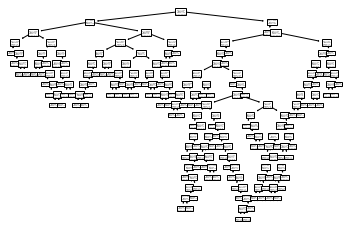

In [39]:
from sklearn import tree
tree.plot_tree(text_nb)